# 🔊 **Deepfake Audio Detection using XGBoost & Mel Spectrograms** 🚀


# FLAC to WAV Conversion Script

This script converts 10,000 randomly selected FLAC files to WAV format using `librosa` and `soundfile` libraries.


In [ ]:
import os
import random
import librosa
import soundfile as sf

# Define paths
input_folder = "D:\DL\New folder\flac_D"   # Change this to your actual FLAC dataset path
output_folder = "D:\DL\New folder\wav_D_random10k"      # Change this to where you want to save WAV files

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all FLAC files
flac_files = [f for f in os.listdir(input_folder) if f.endswith(".flac")]

# Randomly select 10,000 files
random.seed(42)  # For reproducibility
selected_files = random.sample(flac_files, 10000)

# Convert FLAC to WAV
for file in selected_files:
    flac_path = os.path.join(input_folder, file)
    wav_path = os.path.join(output_folder, file.replace(".flac", ".wav"))

    # Load FLAC file
    audio, sr = librosa.load(flac_path, sr=None)

    # Save as WAV
    sf.write(wav_path, audio, sr)

print("✅ 10,000 FLAC files successfully converted to WAV!")


# 🎵 Mel Spectrogram Extraction Script

This script extracts **Mel spectrogram features** from a dataset of WAV files and saves them as a NumPy array.


In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set paths
DATASET_PATH = r"d:\DL\New folder\wav_D_random10k"
OUTPUT_PATH = "mel_spectrograms.npy"  # Where to save extracted features

# Parameters
SAMPLE_RATE = 16000  # Standard for speech processing
N_MELS = 128  # Number of Mel bands
HOP_LENGTH = 512  # Step size for FFT
DURATION = 3  # Crop/pad each audio file to 3 seconds
EXPECTED_SAMPLES = SAMPLE_RATE * DURATION  # 3 sec of audio at 16kHz

# Function to load and process an audio file
def extract_mel_spectrogram(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    
    # Ensure fixed length (Pad/Trim)
    if len(y) < EXPECTED_SAMPLES:
        y = np.pad(y, (0, EXPECTED_SAMPLES - len(y)))
    else:
        y = y[:EXPECTED_SAMPLES]

    # Convert to Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS, hop_length=HOP_LENGTH)
    
    # Convert to dB scale
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    return mel_spec_db

# Process all WAV files
mel_spectrograms = []
file_names = os.listdir(DATASET_PATH)

for file in tqdm(file_names):
    if file.endswith(".wav"):
        file_path = os.path.join(DATASET_PATH, file)
        mel_spec = extract_mel_spectrogram(file_path)
        mel_spectrograms.append(mel_spec)

# Convert to NumPy array and save
mel_spectrograms = np.array(mel_spectrograms)
np.save(OUTPUT_PATH, mel_spectrograms)

print(f"Saved {len(mel_spectrograms)} Mel Spectrograms to {OUTPUT_PATH}")


# 🎯 K-Means Clustering on Mel Spectrogram Features

This script performs **K-Means clustering** on extracted **Mel spectrogram features**.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load Mel spectrograms
mel_spectrograms = np.load("mel_spectrograms.npy", allow_pickle=True)

# Flatten each spectrogram into a single feature vector
features = np.array([mel_spec.flatten() for mel_spec in mel_spectrograms])

# Convert to a pandas DataFrame
df = pd.DataFrame(features)

# Now you can apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Print the first few rows
print(df.head())


C:\Users\ag800\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           0          1          2          3          4          5  \
0 -62.363113 -65.023834 -63.153427 -65.651627 -71.711250 -64.777969   
1 -61.411858 -52.315063 -46.695656 -48.246719 -52.584442 -54.070667   
2 -57.527676 -44.862976 -36.011906 -36.433643 -40.705860 -51.469429   
3 -60.671108 -61.329388 -58.627346 -49.522446 -46.438328 -48.691353   
4 -44.347710 -41.196663 -42.655899 -47.467148 -48.118378 -46.018867   

           6          7          8          9  ...      12023      12024  \
0 -61.469177 -58.754547 -58.777367 -61.867458  ... -80.000000 -80.000000   
1 -56.496895 -56.510284 -63.791077 -62.417755  ... -68.898094 -76.656082   
2 -44.171715 -43.880516 -48.621666 -47.678345  ... -73.154579 -74.308640   
3 -35.830662 -29.887281 -31.568998 -35.966644  ... -80.000000 -80.000000   
4 -49.362228 -54.047073 -52.984032 -53.770134  ... -69.695221 -71.810188   

       12025      12026      12027      12028      12029      12030  \
0 -80.000000 -80.000000 -80.000000 -80.000000

In [2]:
print(df['cluster'].value_counts())


cluster
0    5656
1    4344
Name: count, dtype: int64


# 🎨 Visualizing K-Means Clustering with PCA

This script **reduces feature dimensions using PCA** and **visualizes K-Means clusters**.



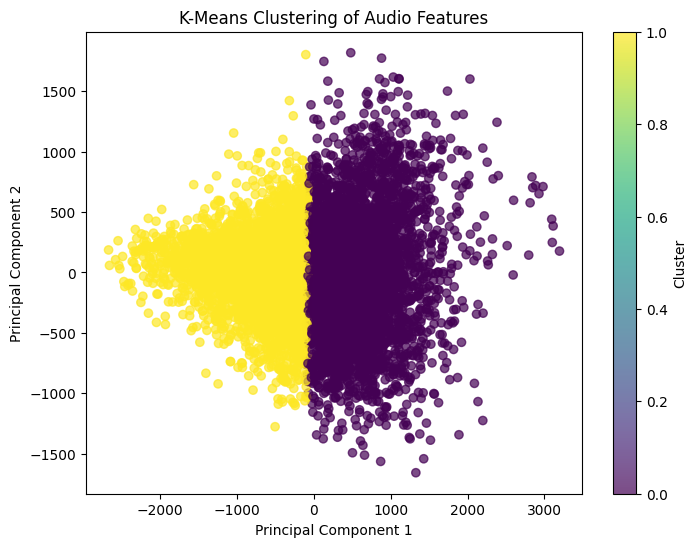

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.iloc[:, :-1])  # Ignore cluster column

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering of Audio Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# 🏷️ Assigning Labels to Clusters

This script **maps K-Means cluster labels** to meaningful categories (e.g., "Real" and "Deepfake")ead())


In [4]:
df['label'] = df['cluster'].map({0: "Real", 1: "Deepfake"})  # Adjust if needed
print(df.head())


           0          1          2          3          4          5  \
0 -62.363113 -65.023834 -63.153427 -65.651627 -71.711250 -64.777969   
1 -61.411858 -52.315063 -46.695656 -48.246719 -52.584442 -54.070667   
2 -57.527676 -44.862976 -36.011906 -36.433643 -40.705860 -51.469429   
3 -60.671108 -61.329388 -58.627346 -49.522446 -46.438328 -48.691353   
4 -44.347710 -41.196663 -42.655899 -47.467148 -48.118378 -46.018867   

           6          7          8          9  ...      12024      12025  \
0 -61.469177 -58.754547 -58.777367 -61.867458  ... -80.000000 -80.000000   
1 -56.496895 -56.510284 -63.791077 -62.417755  ... -76.656082 -80.000000   
2 -44.171715 -43.880516 -48.621666 -47.678345  ... -74.308640 -65.601349   
3 -35.830662 -29.887281 -31.568998 -35.966644  ... -80.000000 -80.000000   
4 -49.362228 -54.047073 -52.984032 -53.770134  ... -71.810188 -62.784935   

       12026      12027      12028      12029      12030      12031  cluster  \
0 -80.000000 -80.000000 -80.000000 -

In [5]:
print(df['cluster'].value_counts())


cluster
0    5656
1    4344
Name: count, dtype: int64


# 🚀 Training XGBoost Classifier on Pseudo-Labels

This script trains an **XGBoost classifier** on the extracted audio features using **K-Means pseudo-labels**.

## 📌 Requirements
Ensure you have the necessary dependencies installed:
```bash
pip install xgboost scikit-learn pandas numpy


In [7]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Prepare data
X = df.iloc[:, :-2]  # Features (excluding cluster and label columns)
y = df['cluster']  # Use pseudo-labels

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model with regularization to avoid overfitting
model = XGBClassifier(
    max_depth=6,             # Prevents overly complex trees (default is 6)
    learning_rate=0.05,      # Lower learning rate for better generalization
    n_estimators=500,        # Higher trees for better learning
    subsample=0.8,           # Uses 80% of data per tree (reduces variance)
    colsample_bytree=0.8,    # Uses 80% of features per tree
    reg_lambda=1,            # L2 regularization (ridge penalty)
    reg_alpha=0.5,           # L1 regularization (lasso penalty)
    eval_metric="logloss",   # Evaluation metric for binary classification
    use_label_encoder=False
)

# Train model WITHOUT early stopping
model.fit(
    X_train, y_train
)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")


C:\Users\ag800\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:47:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.95


# 🚀 Training and Deploying XGBoost Classifier for Deepfake Detection

This project builds an **XGBoost-based deepfake audio detector** using **Mel spectrogram features** and **K-Means pseudo-labeling**. After training, the model is saved and can be reloaded for real-time predictions.


In [8]:
# Load the saved model
model = joblib.load("xgboost_deepfake_detector.pkl")

# Use the model for predictions
y_pred = model.predict(X_test)
print("Model loaded successfully!")
print(y_pred)


Model saved successfully!


In [10]:
# Load the saved model
model = joblib.load("xgboost_deepfake_detector.pkl")

# Use the model for predictions
y_pred = model.predict(X_test)
print("Model loaded successfully!")
print(y_pred)


Model loaded successfully!
[0 1 1 ... 0 0 0]
